In [13]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [14]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

#print(hists['recoil'].identifiers('dataset'))
#print(hists['recoil'].project('dataset', 'MonoHs_Mzprime_500_Mhs_90_Mchi_150____0').values(overflow='all'))
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8 6235661.084600944
QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8 54204361.97182541
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 297176175890.39703
ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8 715082.9124486722
QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8 93948241.26754017
DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11516745.853159327
ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 334874722.2088432
ZJetsToNuNu_HT-100To200_13TeV-madgraph 23675936.023209557
ggZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 26961.832887386816
ZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 558251.7187889507
ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 5109801475.370131
ZJetsToNuNu_HT-200To400_13TeV-madgraph 23232889.88735804
QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8 54247037.513652936
MonoHs_Mzprime_500_Mhs_90_Mchi_150 297390.7091100482
ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 266

In [15]:
data_hists={}

for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [16]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["DY"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
process_map["ZJets"] = ("ZJetsToNuNu*",)   ## temporarily 

signal_hists = {}
signal_cats = ("pdataset",)
signal_map = OrderedDict() ### for signal samples
signal_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
signal_map["Mhs_70"] = ("*Mhs_70*",)
signal_map["Mhs_90"] = ("*Mhs_90*",)
signal_map["MonoJet"] = ("MonoJet*",)  ## signals
signal_map["MonoW"] = ("MonoW*",)    ## signals
signal_map["MonoZ"] = ("MonoZ*",)    ## signals

#print(process_map)

#data_r_map['isoneE'] = 'SingleElectron'
#data_r_map['isoneM'] = 'MET'
#data_r_map['istwoE'] = 'SingleElectron'
#data_r_map['istwoM'] = 'MET'
#data_r_map['isoneA'] = 'SinglePhoton'
#data_r_map['iszeroL'] = 'MET'

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in hists.keys():
    signal_hists[key] = hists[key].group(process, signal_cats, signal_map)
    print(signal_hists[key])
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

#print(hists['recoil'].identifiers('process'))
#print(hists['recoil'].project('MonoDh', 'MonoHs_Mzprime_500_Mhs_50_Mchi_150').values(overflow='all')[()][1])

<Hist (process,sumw) instance at 0x7f0c8dc99748>
sumw
<Hist (process,region,jet_selection,CaloMinusPfOverRecoil) instance at 0x7f0c8c5396a0>
CaloMinusPfOverRecoil
<Hist (process,region,jet_selection,recoil) instance at 0x7f0c8a44e080>
recoil
<Hist (process,region,jet_selection,mindphi) instance at 0x7f0c8a44ef98>
mindphi
<Hist (process,region,jet_selection,j1pt) instance at 0x7f0c8a44e048>
j1pt
<Hist (process,region,jet_selection,j1eta) instance at 0x7f0c8a44e7f0>
j1eta
<Hist (process,region,jet_selection,j1phi) instance at 0x7f0c8a44e320>
j1phi
<Hist (process,region,jet_selection,fj1pt) instance at 0x7f0c8c539710>
fj1pt
<Hist (process,region,jet_selection,fj1eta) instance at 0x7f0c8c539780>
fj1eta
<Hist (process,region,jet_selection,fj1phi) instance at 0x7f0c8c539860>
fj1phi
<Hist (process,region,jet_selection,njets) instance at 0x7f0c8c539940>
njets
<Hist (process,region,jet_selection,nfjets) instance at 0x7f0c8c539908>
nfjets
<Hist (process,region,jet_selection,fjmass) instance at 0

In [7]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [16]:
#hists['recoil'].project('process','Hbb').values()

In [27]:
data_map['isoneE'] = 'SingleElectron'
data_map['isoneM'] = 'MET'
data_map['istwoE'] = 'SingleElectron'
data_map['istwoM'] = 'MET'
data_map['isoneA'] = 'SinglePhoton'
data_map['iszeroL'] = 'MET'

for r in hists['recoil'].identifiers('region'):
    exp = 0
    print('------------------')
    print('------------------')
    print('Category:',r)
    print('------------------')
    #print(hists['recoil'].identifiers('process'))
    for p in hists['recoil'].identifiers('process'):
        yld = np.sum(hists['recoil'].project('jet_selection','skinny').project('region','iszeroL').project('process', p).values(overflow='all')[()])
        #yld = np.sum(hists['recoil'].project('jet_selection','baggy').project('region',r).project('process', p).values(overflow='all')[()])
        exp += yld
        print(p, '%.1f' % yld)
      
    for p in signal_hists['recoil'].identifiers('process'):
        yld = np.sum(signal_hists['recoil'].project('jet_selection','skinny').project('region','iszeroL').project('process', p).values(overflow='all')[()])
        print(p, '%.1f' % yld)
    
    print('------------------')
    print('Total expected:', '%.1f' % exp)
    #print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection','baggy').project('region',r).project('process',data_map[r.name]).values(overflow='all')[()]))   
    #print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection','baggy').project('region',r).project('process',data_map[r.name]).values(overflow='all')[()]))
    print('------------------')
    print('------------------')
    print()

------------------
------------------
Category: isoneE
------------------
Hbb 65.4
DY 823.3
Diboson 2700.3
ST 2176.0
TT 22579.5
Wjets 56000.7
ZJets 83157.2
Mhs_50 1334.8
Mhs_70 2572.2
Mhs_90 3674.6
MonoJet 2110.3
MonoW 2716.8
MonoZ 2814.9
------------------
Total expected: 167502.2
------------------
------------------

------------------
------------------
Category: isoneM
------------------
Hbb 65.4
DY 823.3
Diboson 2700.3
ST 2176.0
TT 22579.5
Wjets 56000.7
ZJets 83157.2
Mhs_50 1334.8
Mhs_70 2572.2
Mhs_90 3674.6
MonoJet 2110.3
MonoW 2716.8
MonoZ 2814.9
------------------
Total expected: 167502.2
------------------
------------------

------------------
------------------
Category: istwoE
------------------
Hbb 65.4
DY 823.3
Diboson 2700.3
ST 2176.0
TT 22579.5
Wjets 56000.7
ZJets 83157.2
Mhs_50 1334.8
Mhs_70 2572.2
Mhs_90 3674.6
MonoJet 2110.3
MonoW 2716.8
MonoZ 2814.9
------------------
Total expected: 167502.2
------------------
------------------

------------------
---------------

/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


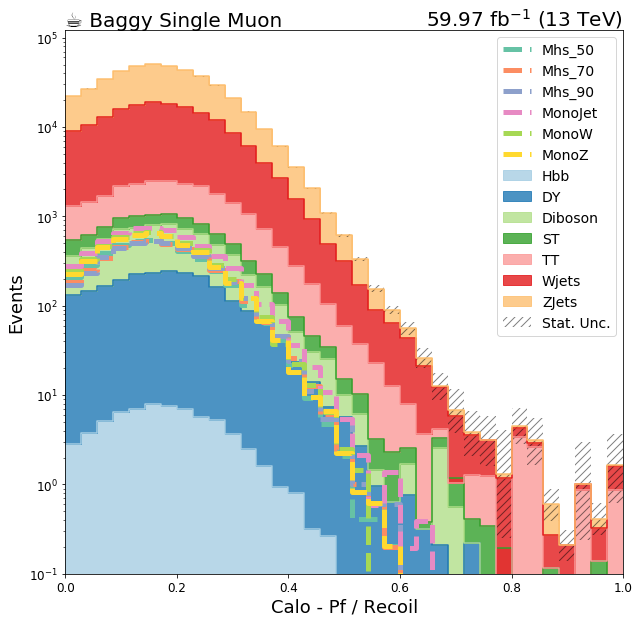

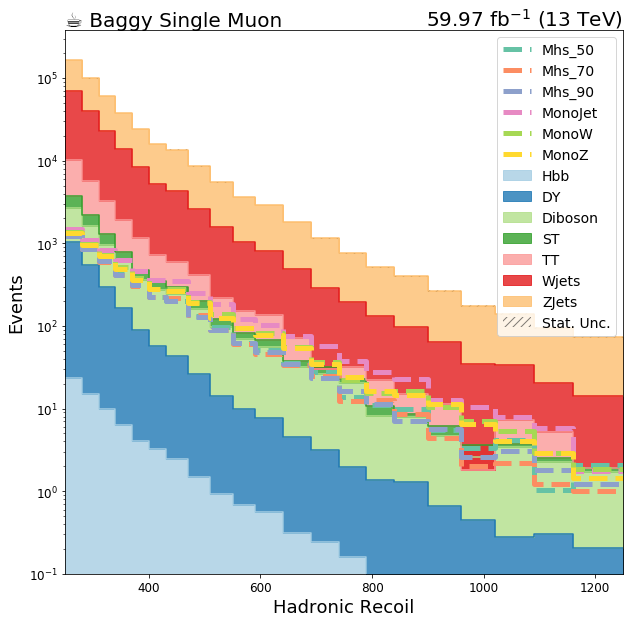

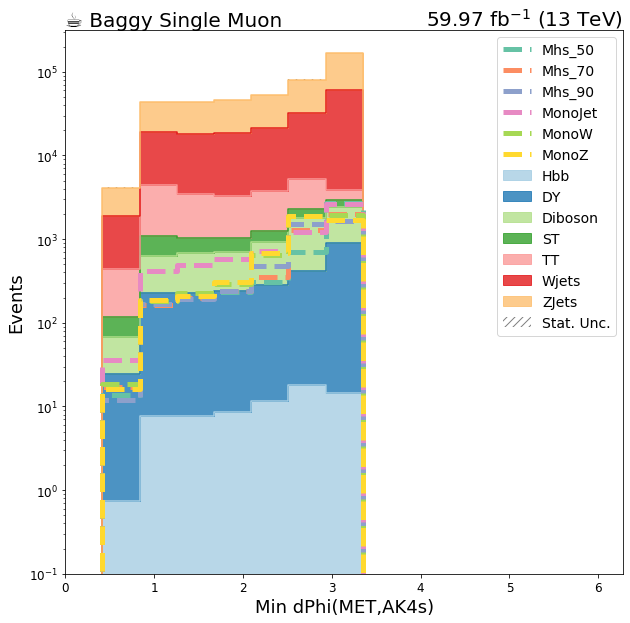

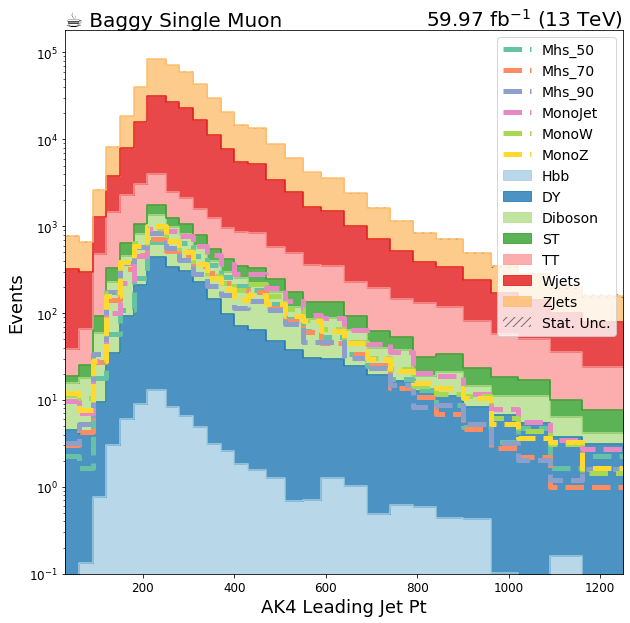

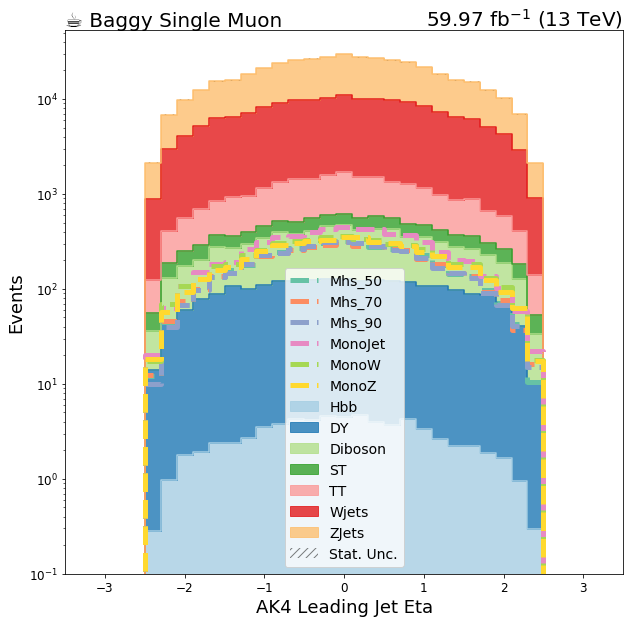

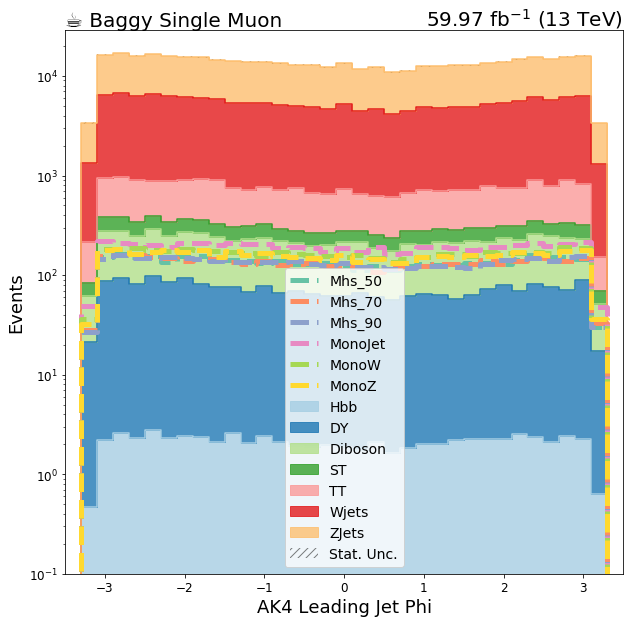

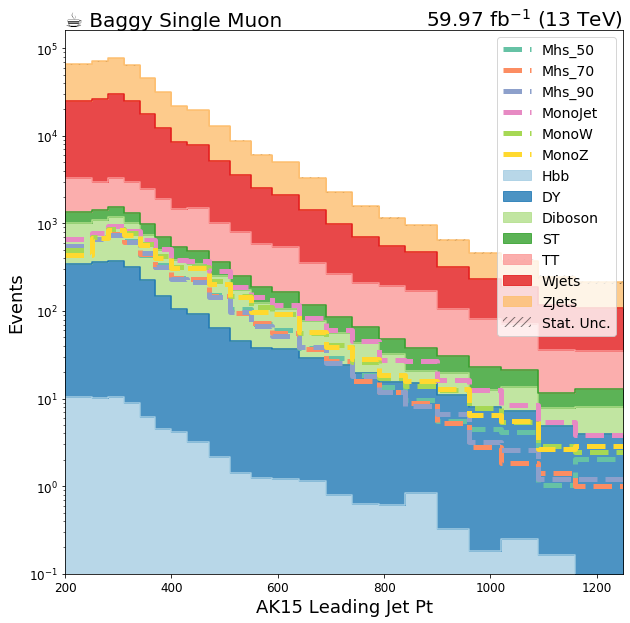

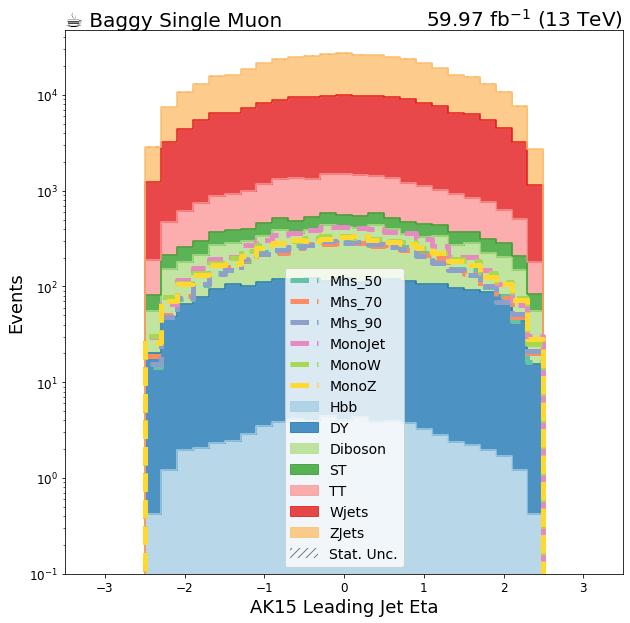

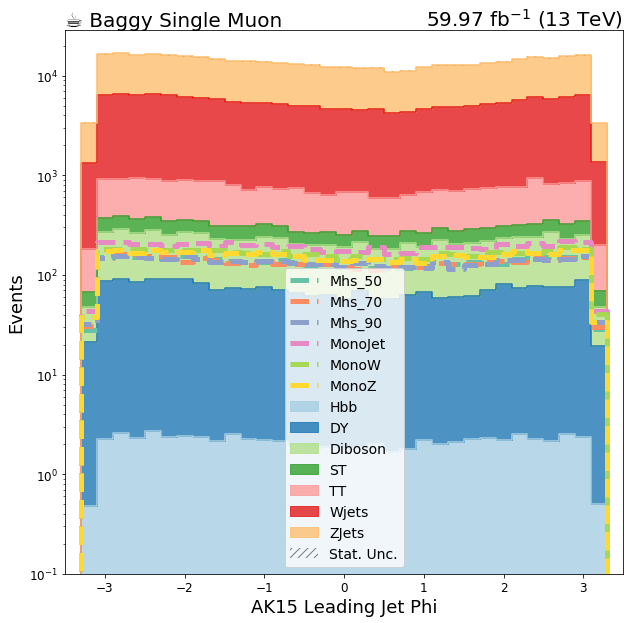

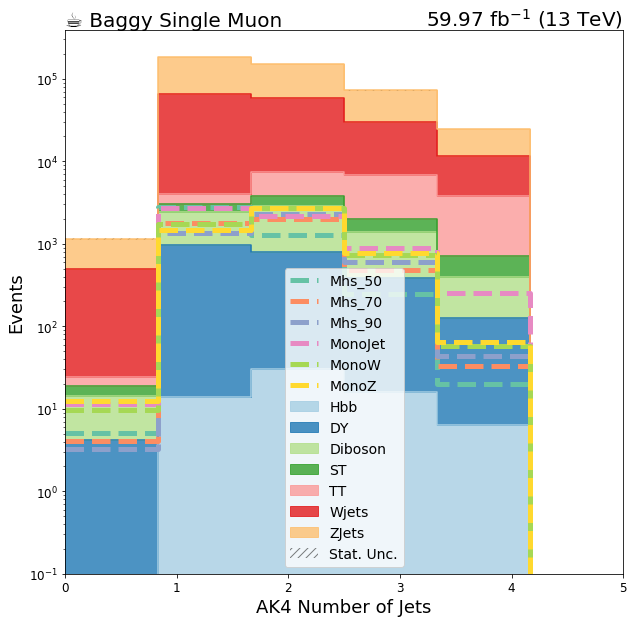

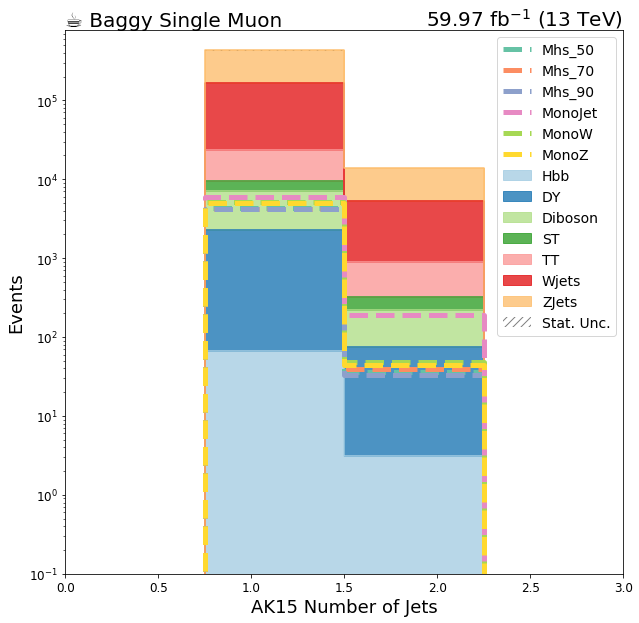

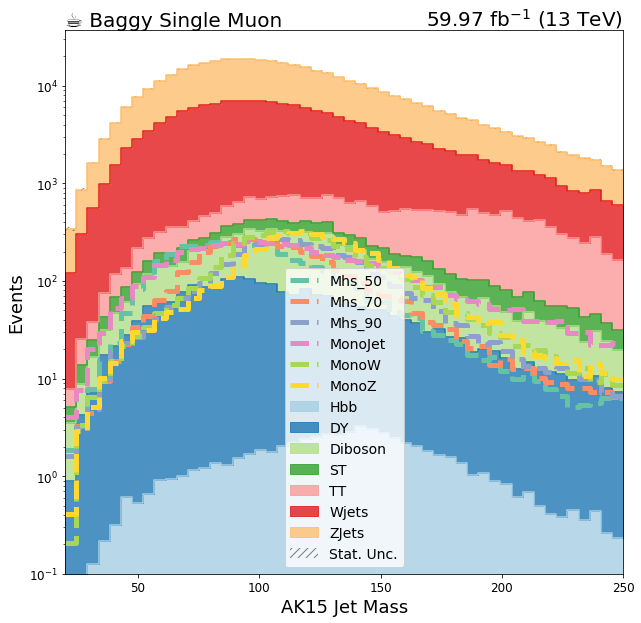

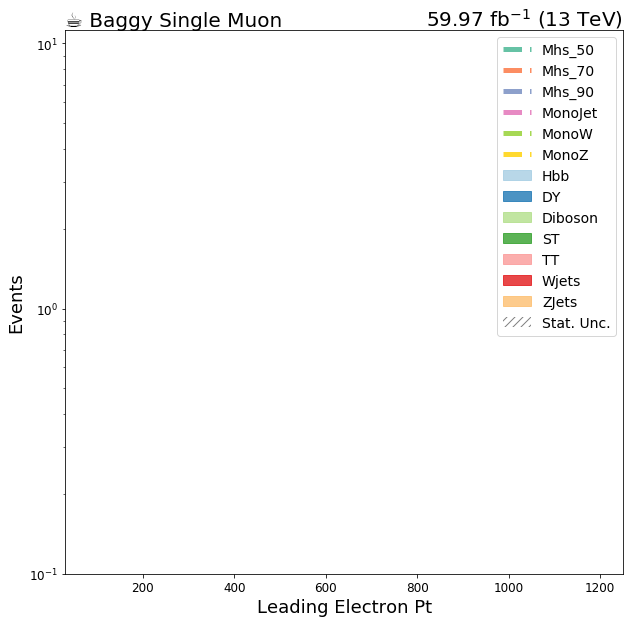

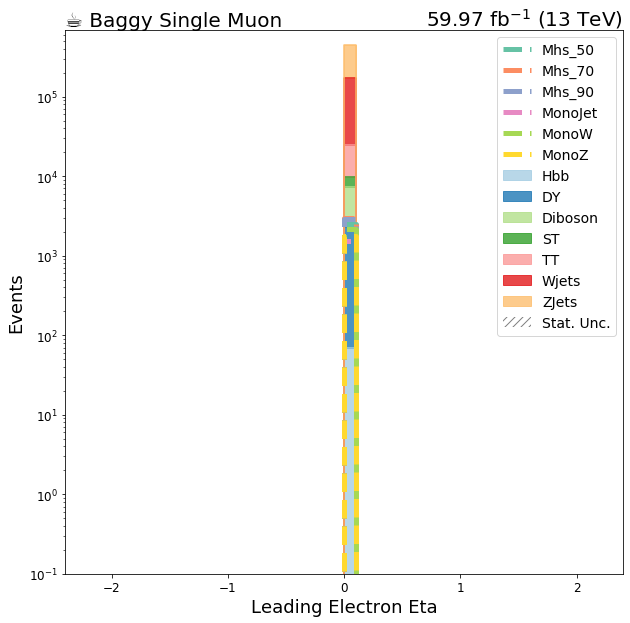

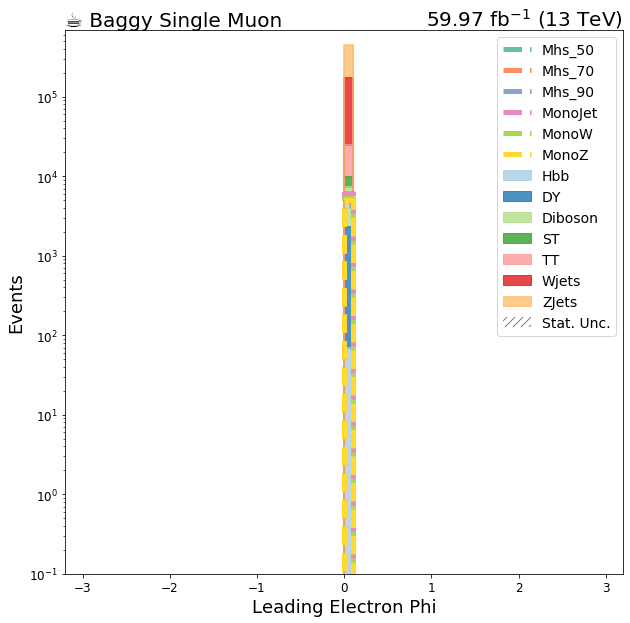

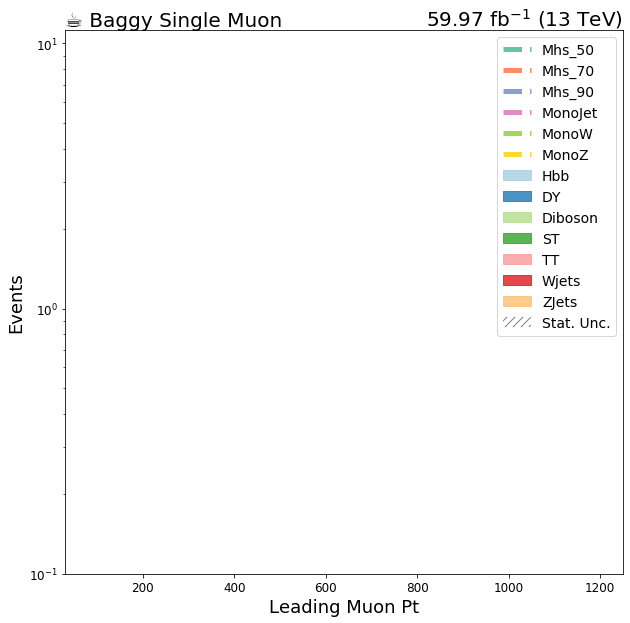

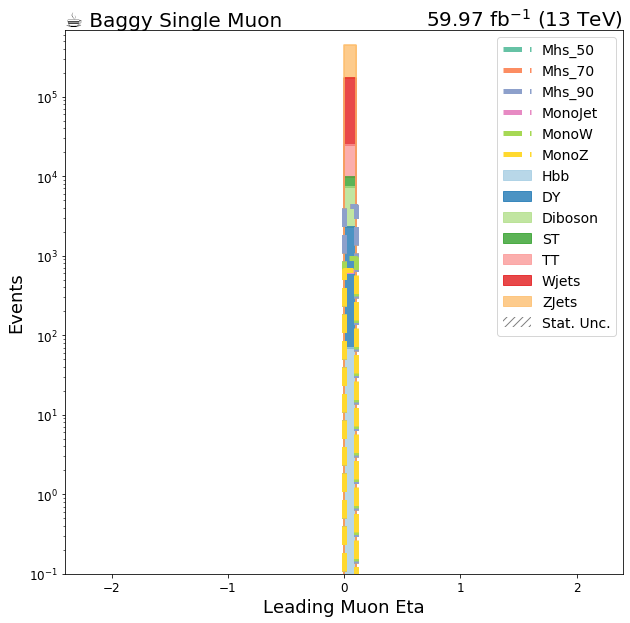

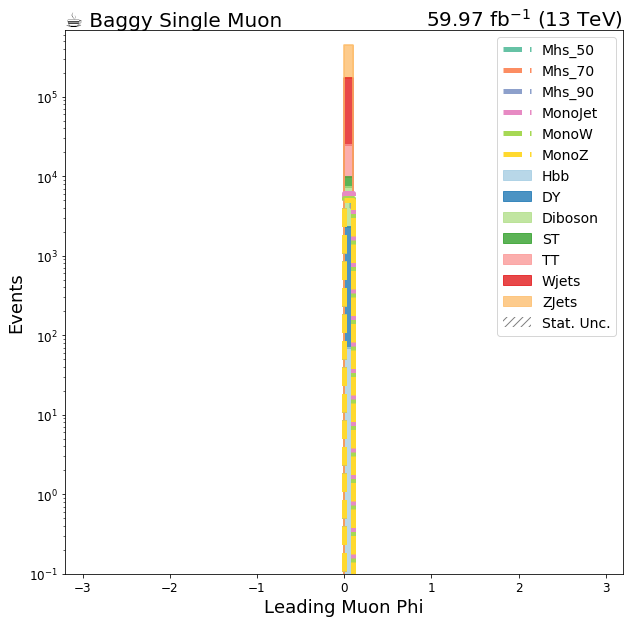

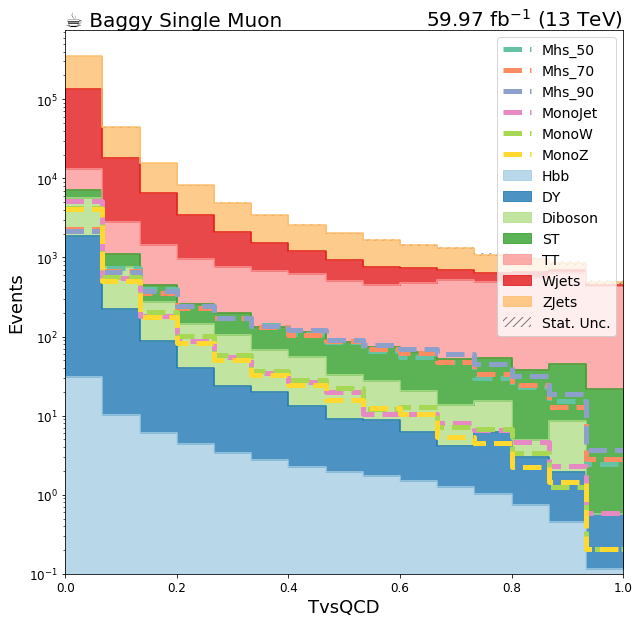

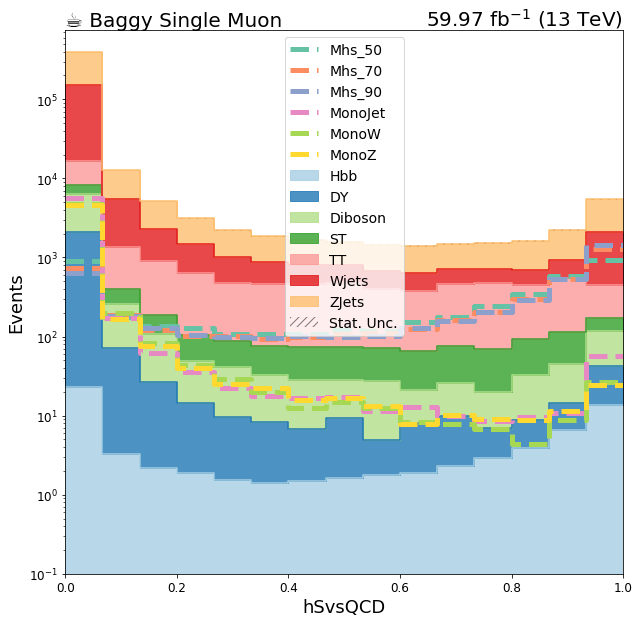

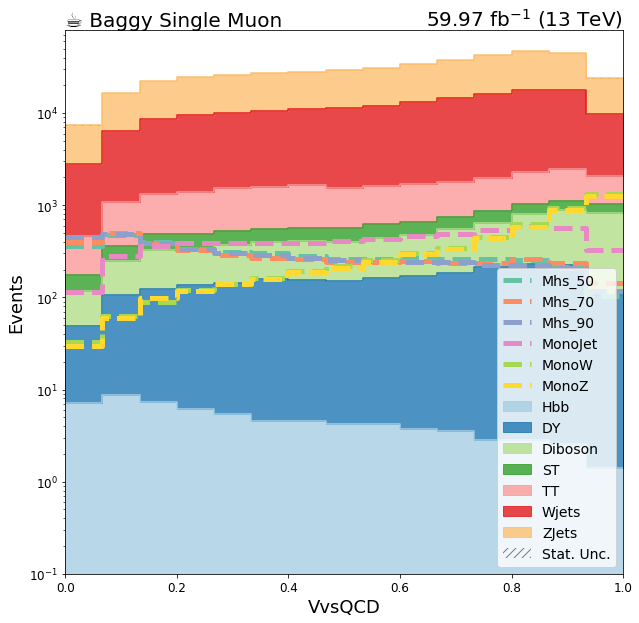

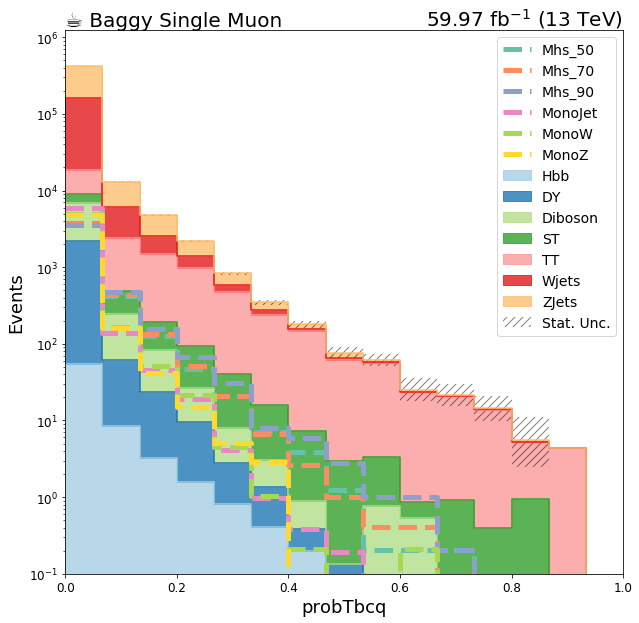

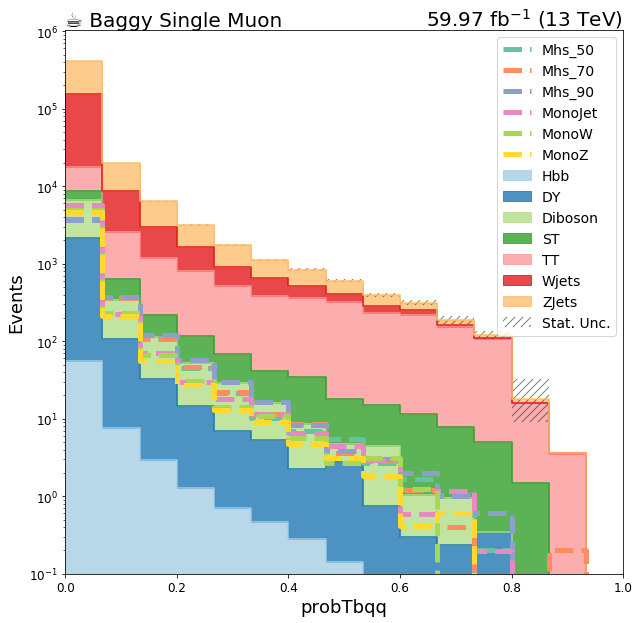

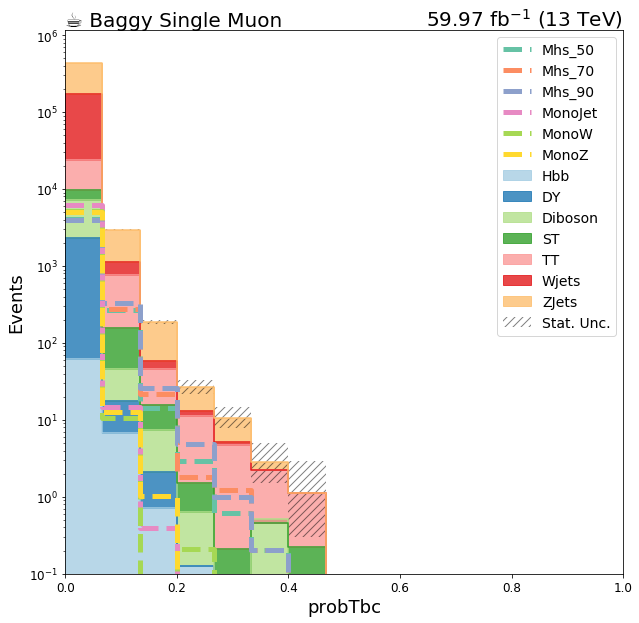

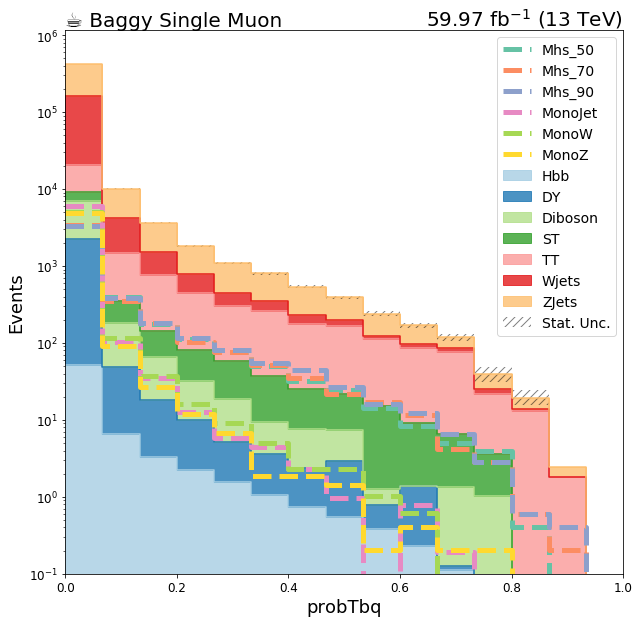

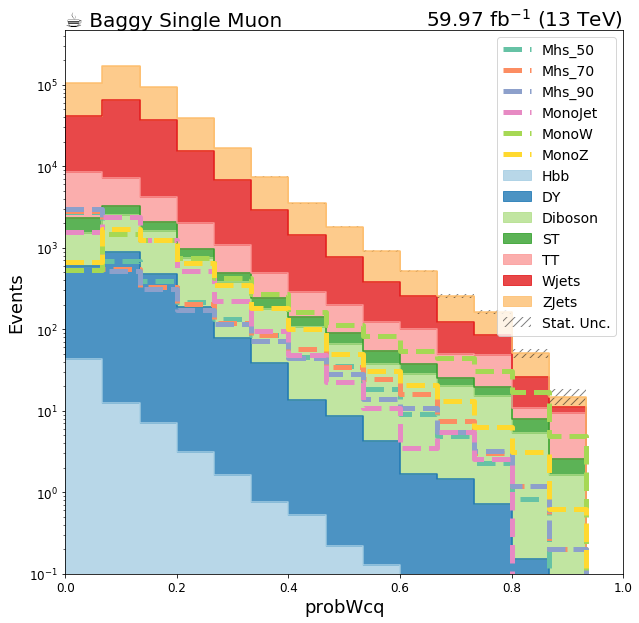

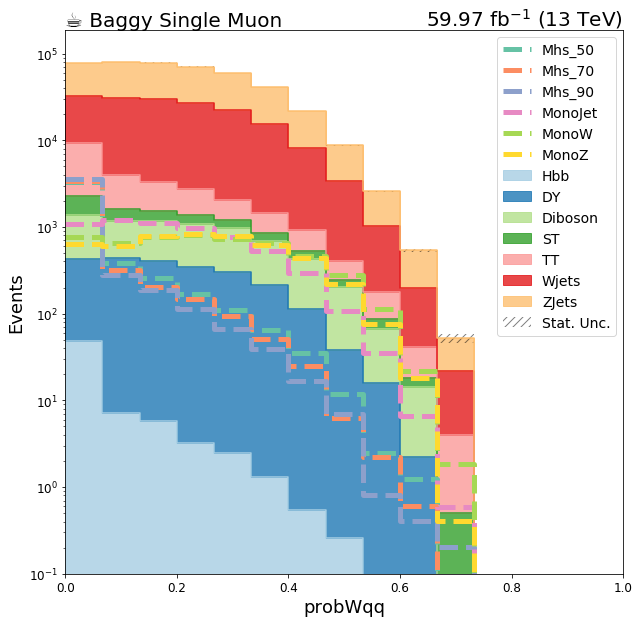

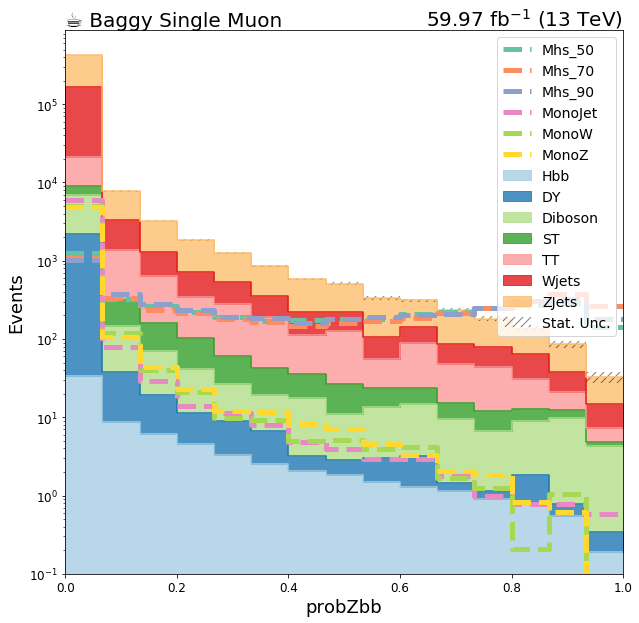

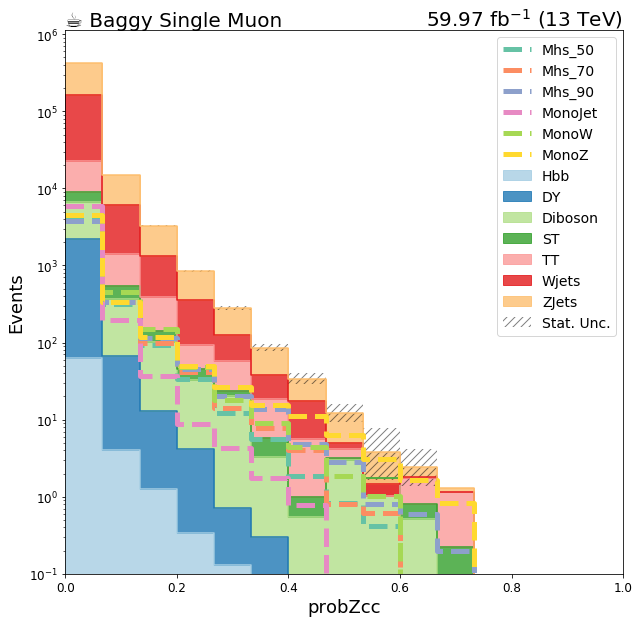

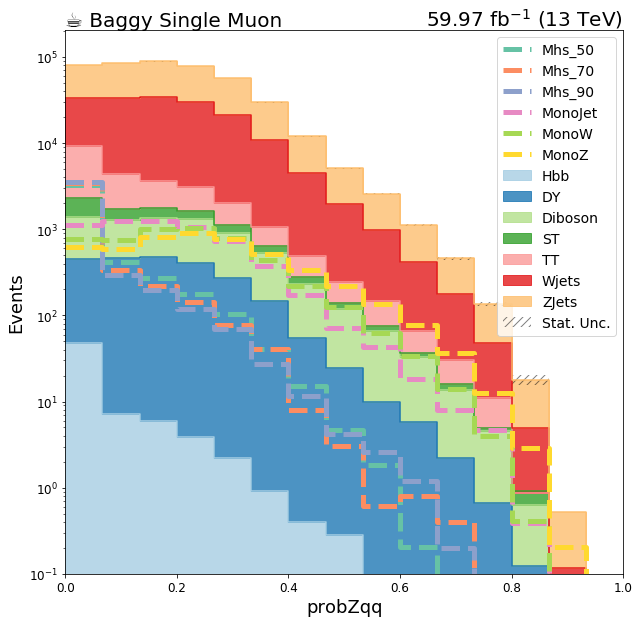

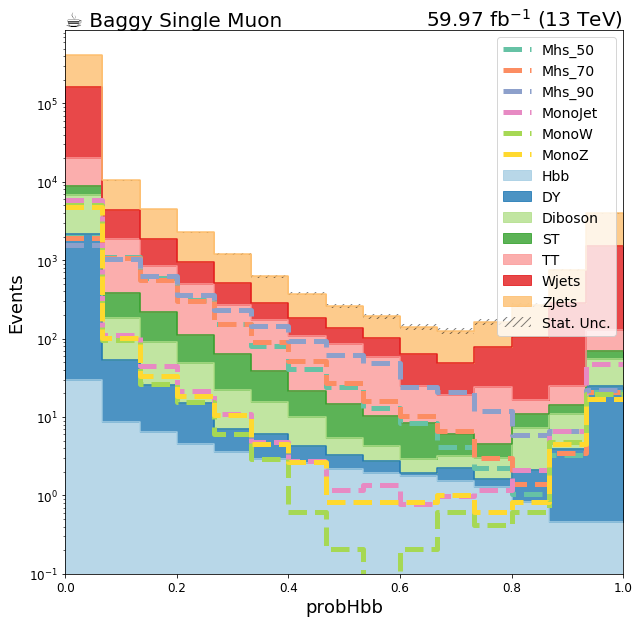

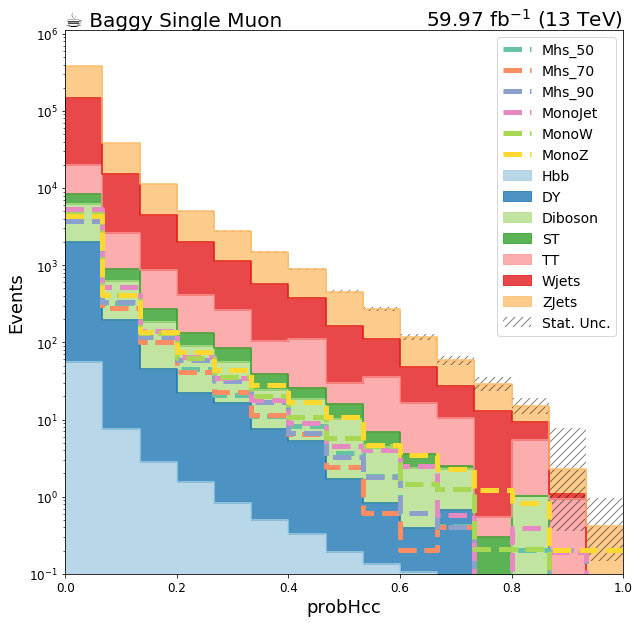

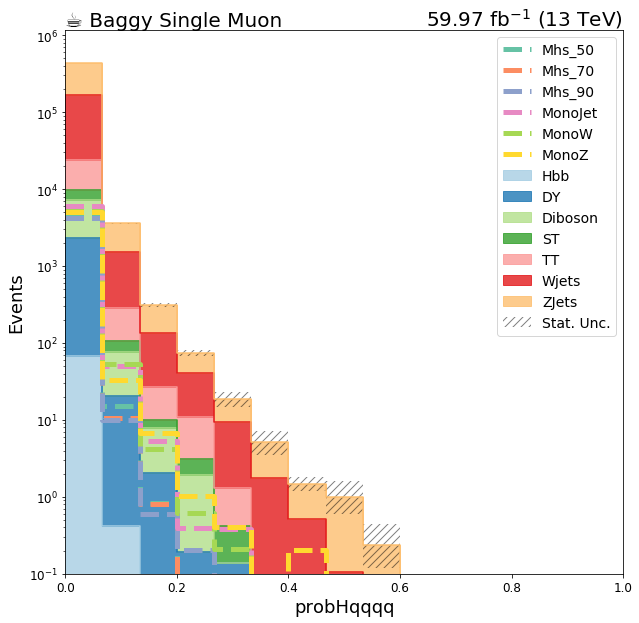

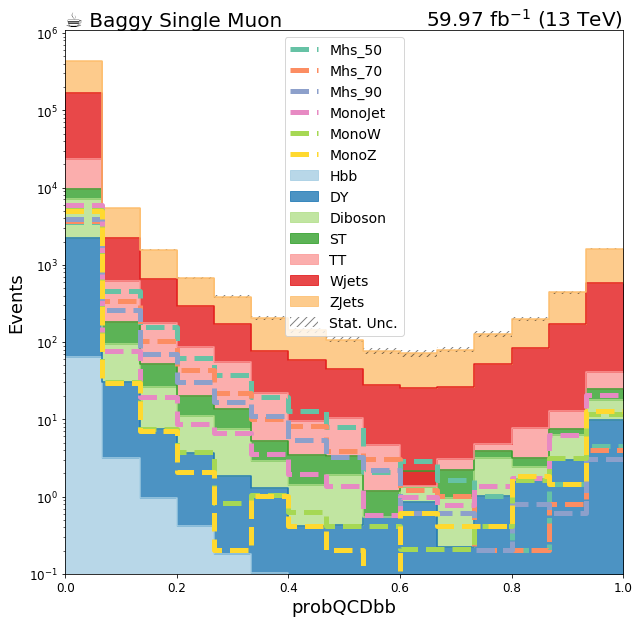

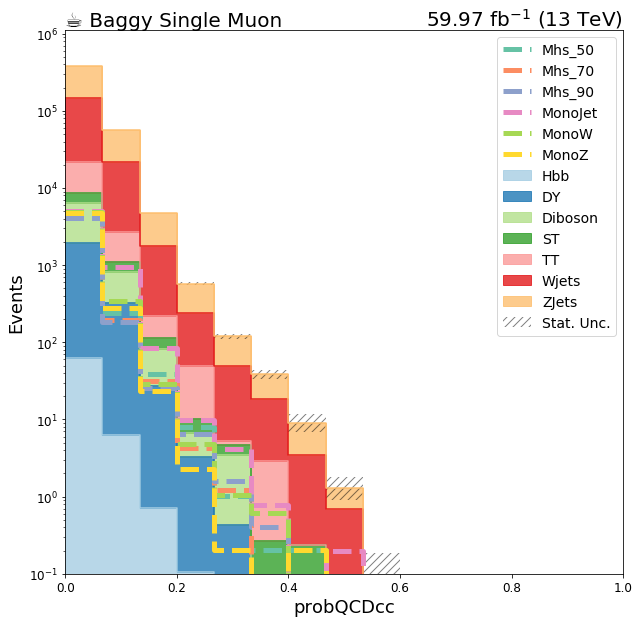

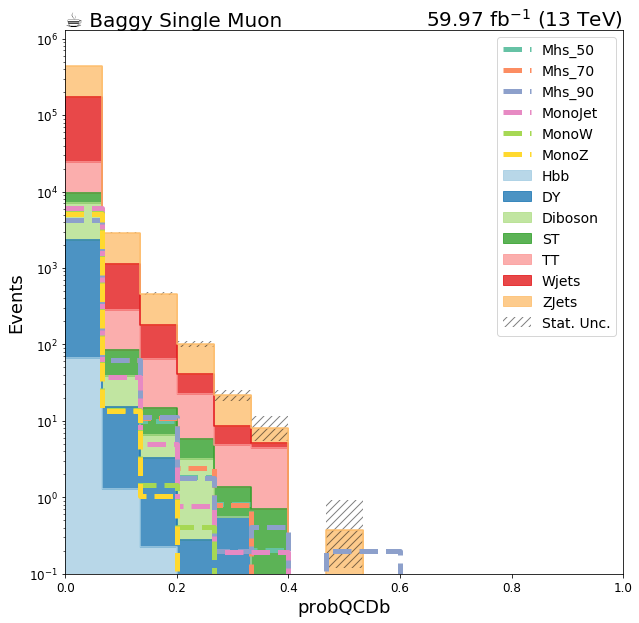

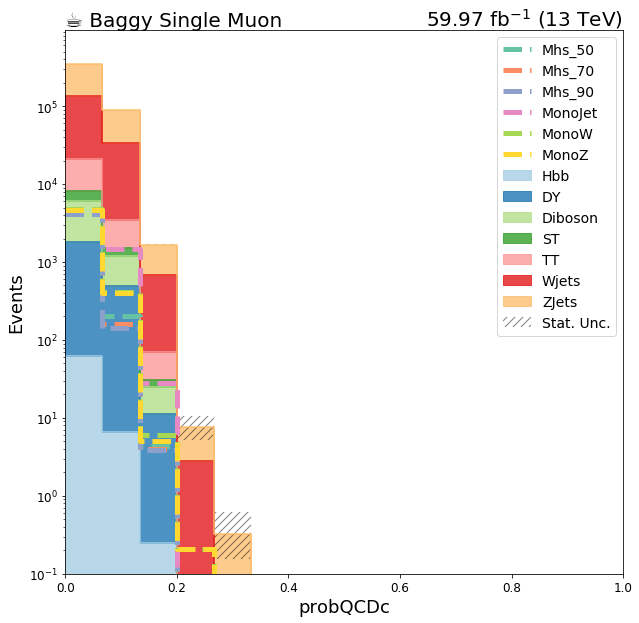

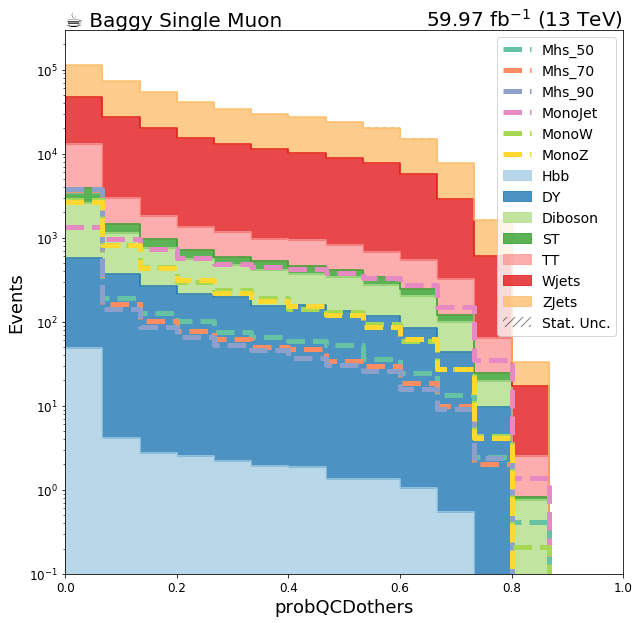

In [44]:
##### http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12 : colors
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    #plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','isoneM'),
    #plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','iszeroL'),            
    #        overlay="process",
    #        ax=ax,
    #        clear=False,
    #        error_opts=data_err_opts
    #           )
    #plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'),
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','iszeroL'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            line_opts={'label':'_'},
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    args = {'linestyle':'--', 'linewidth': 5}
    plot.plot1d(signal_hists[key].project('jet_selection','baggy').project('region','iszeroL'), 
                ax=ax, overlay="process", clear=False, stack=False, line_opts=args)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Baggy Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  # Remove the CWD from sys.path while we load stuff.
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Attempting to set identical bottom == top == 9.99999999999999 results in singular transformations; automatically expanding.
  # Remove the CWD from sys.path while we load stuff.
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


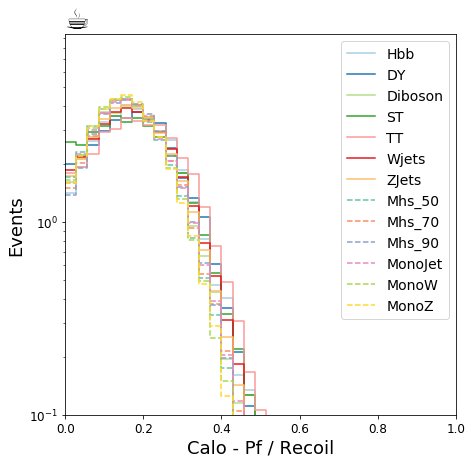

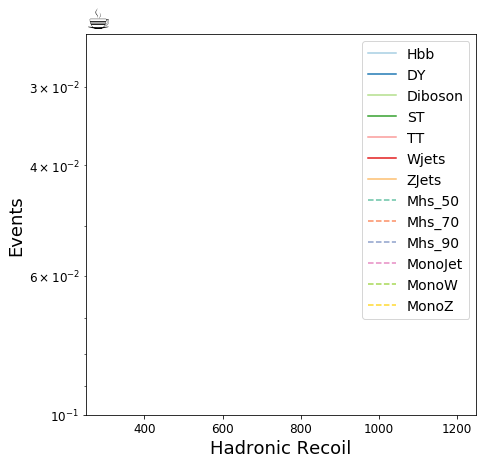

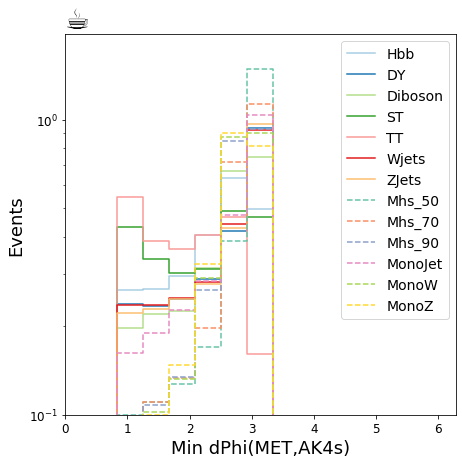

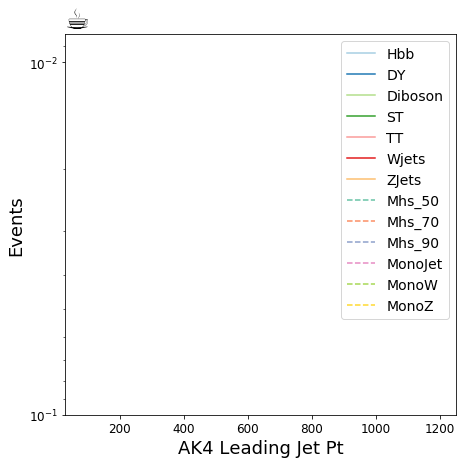

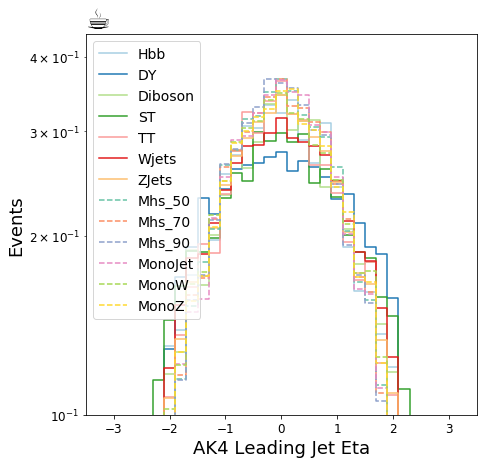

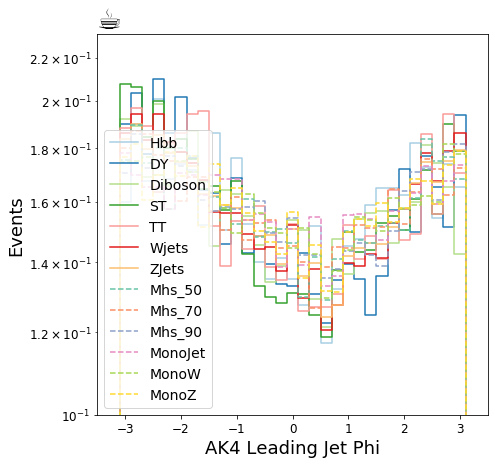

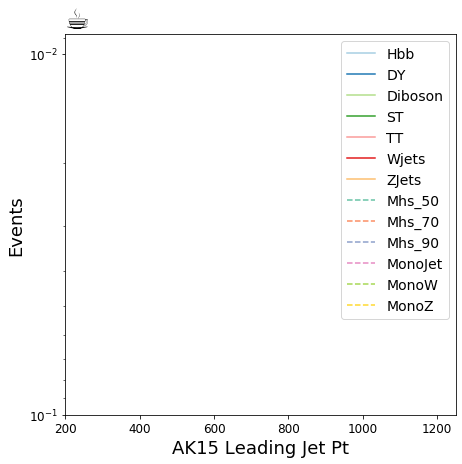

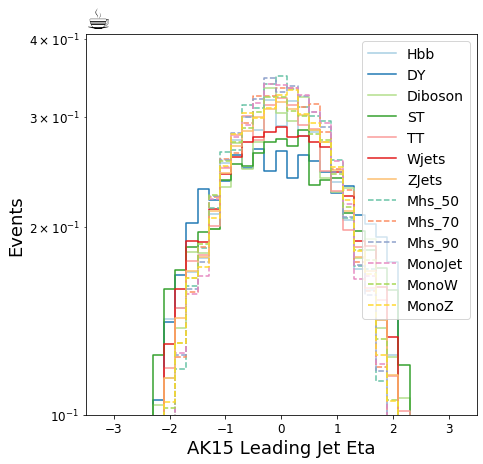

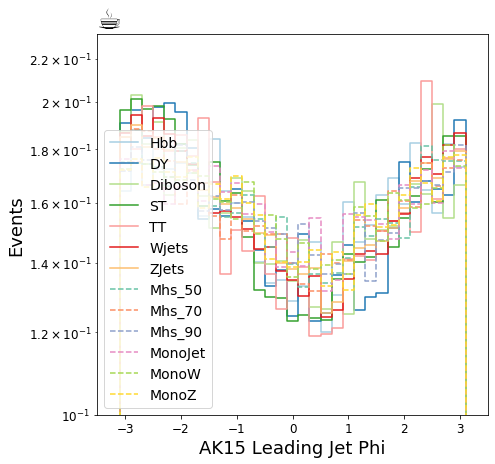

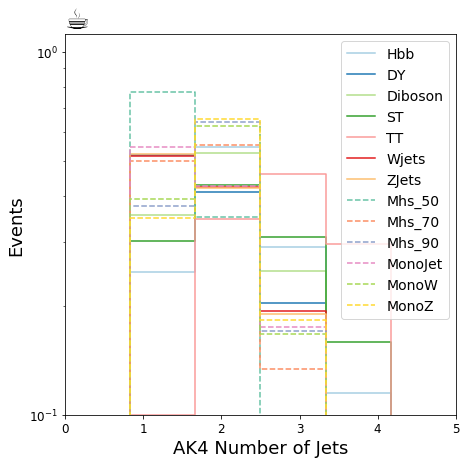

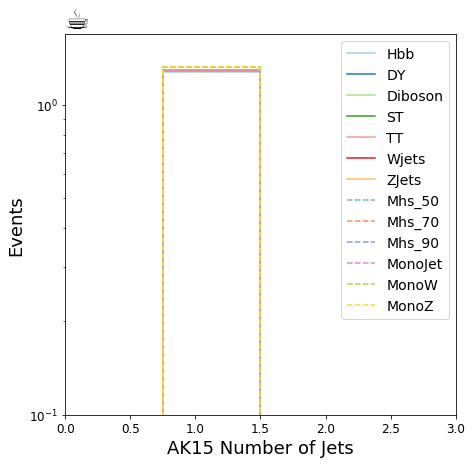

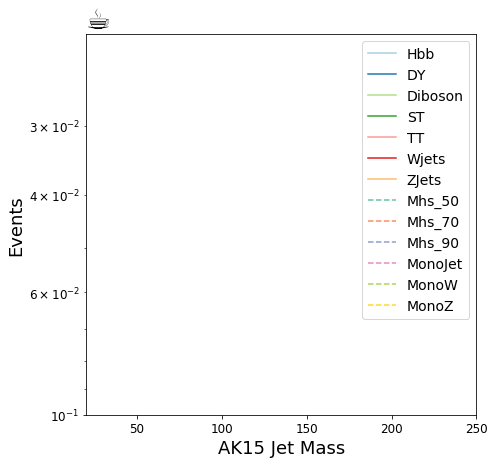

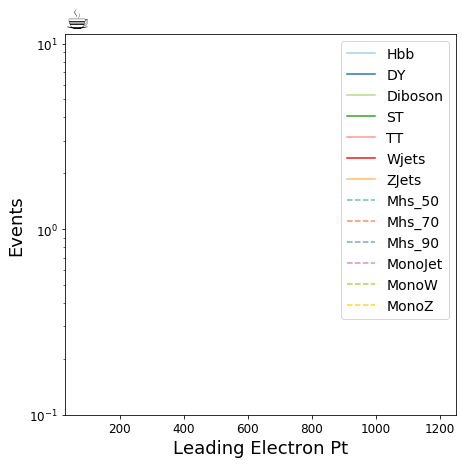

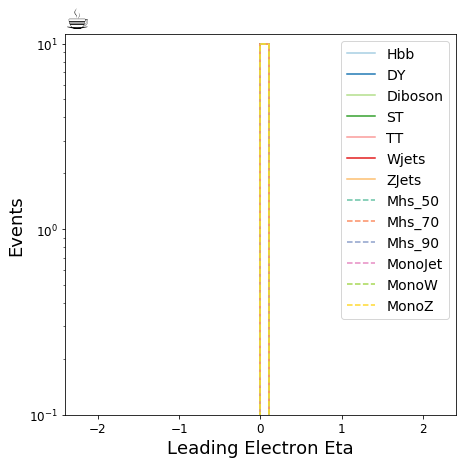

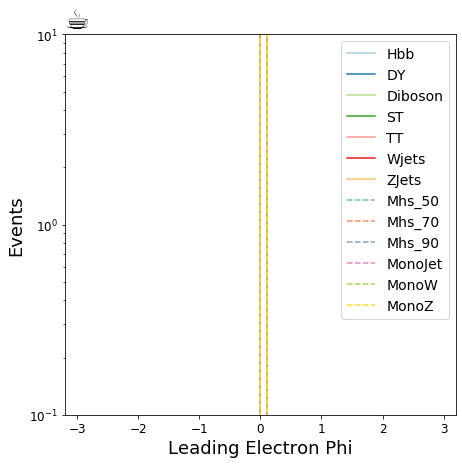

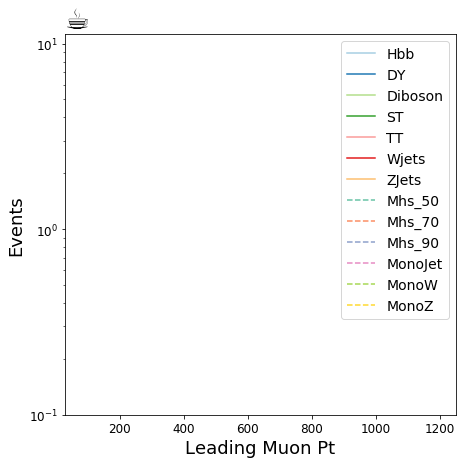

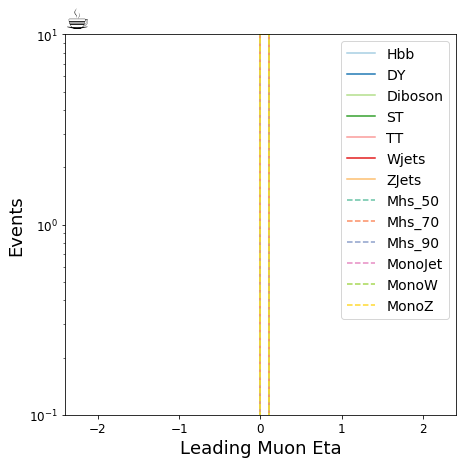

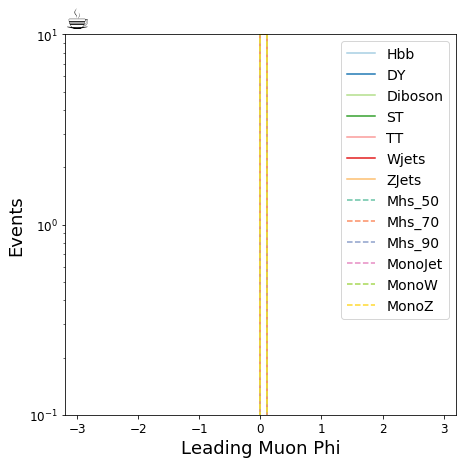

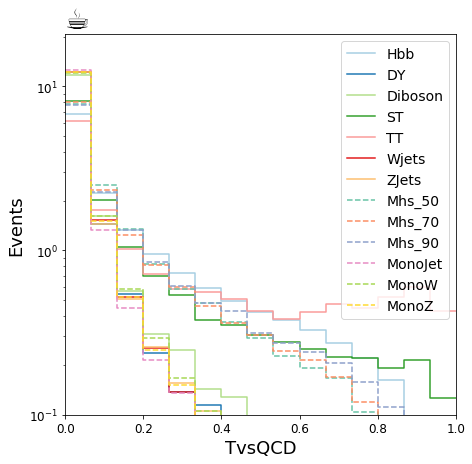

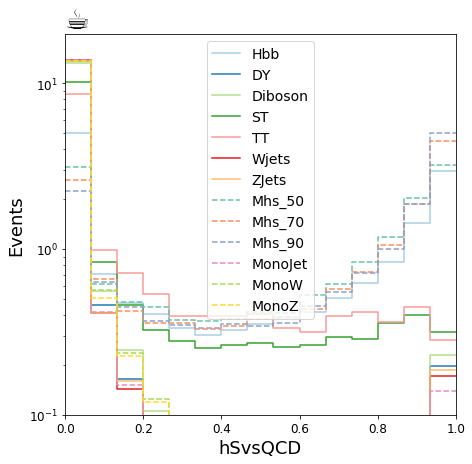

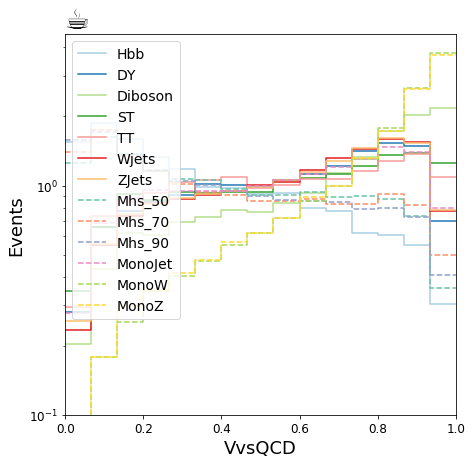

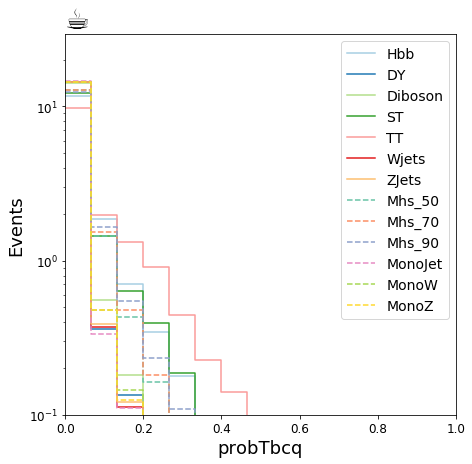

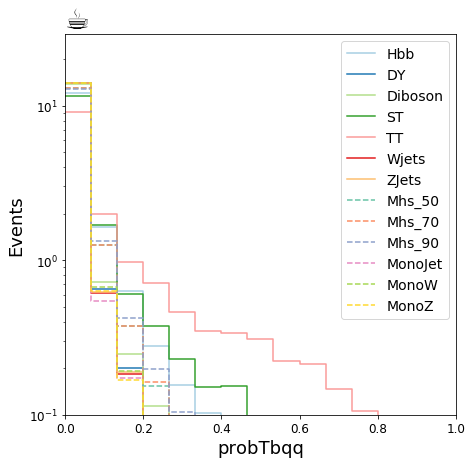

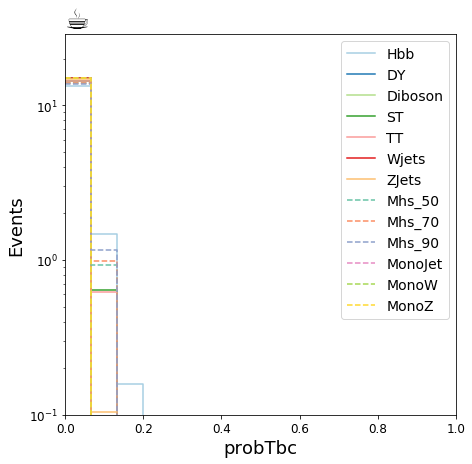

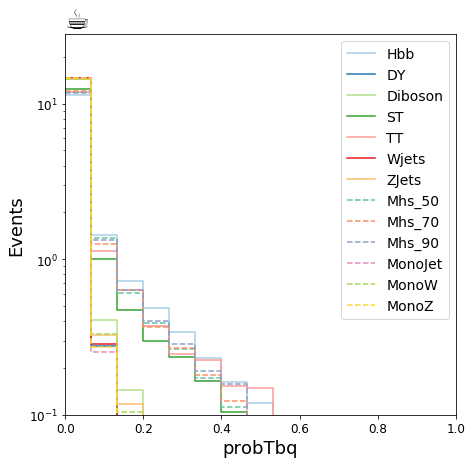

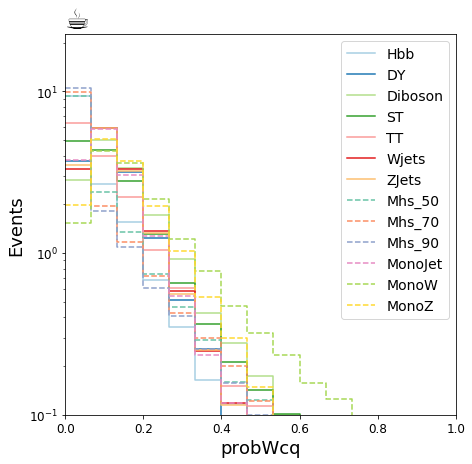

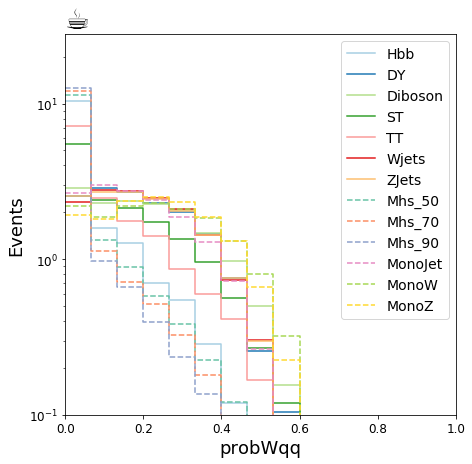

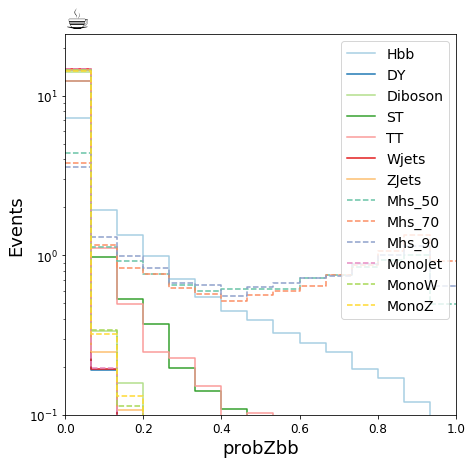

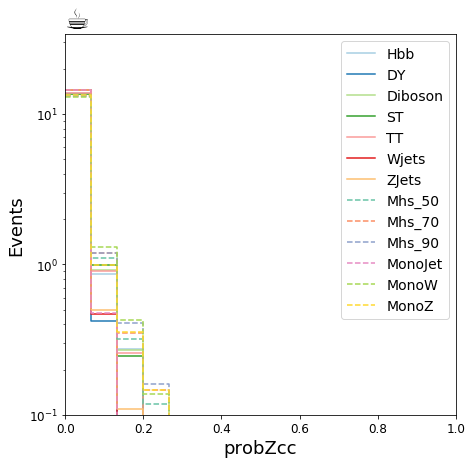

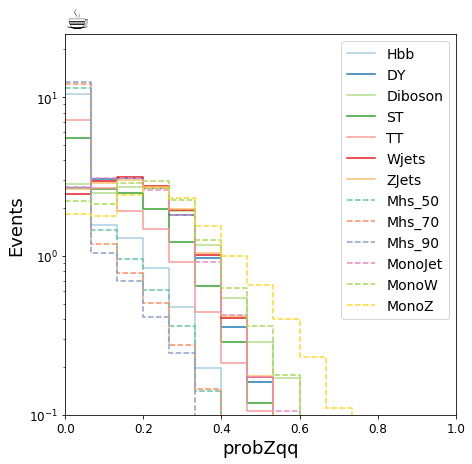

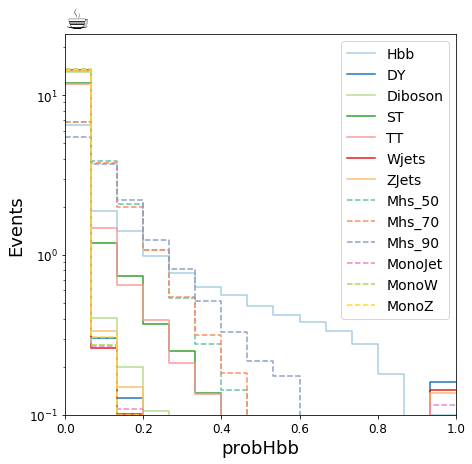

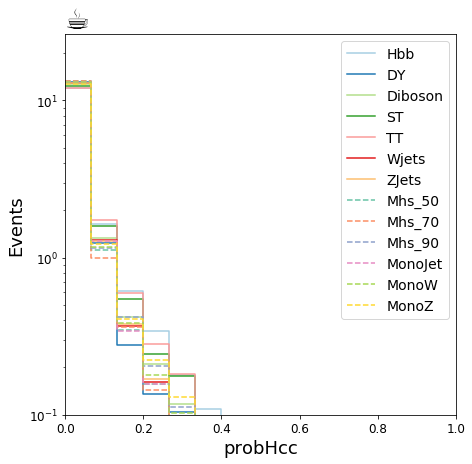

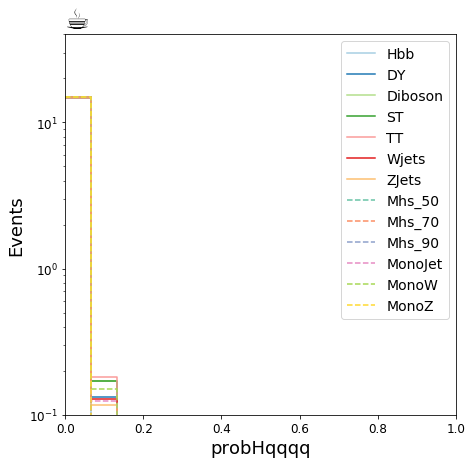

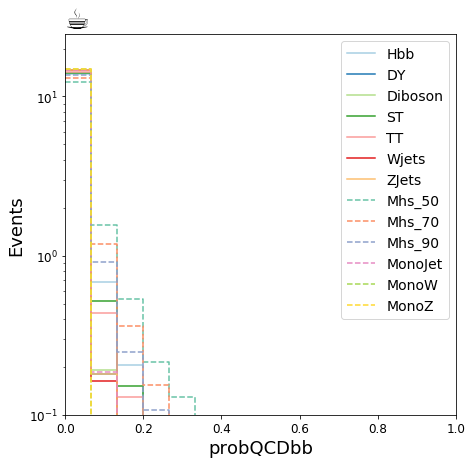

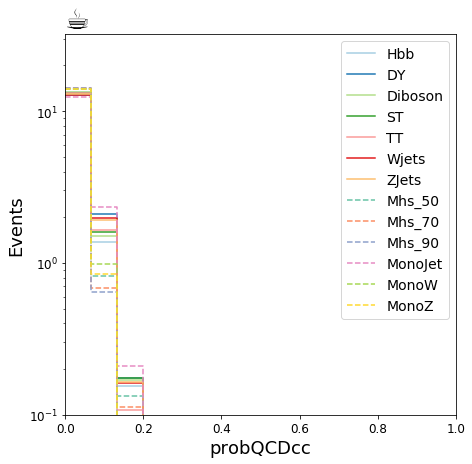

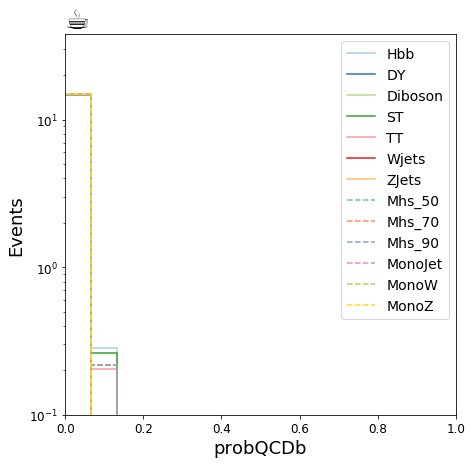

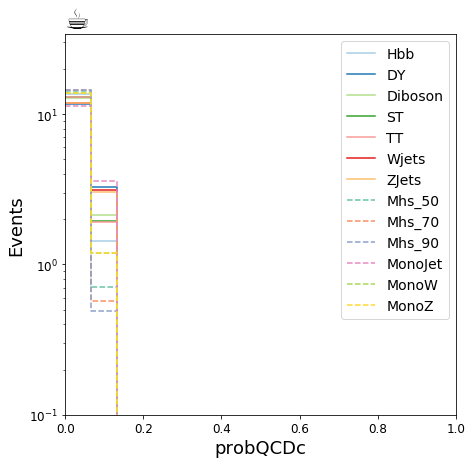

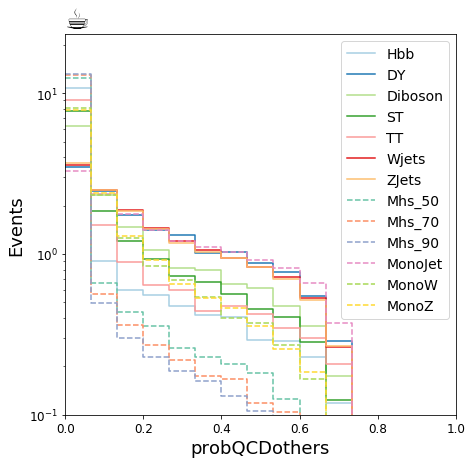

In [39]:
for key in hists.keys():
    if key=='sumw': continue

    args = {'linestyle':'--'}
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    plot.plot1d(signal_hists[key].project('jet_selection','baggy').project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts=args,density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)


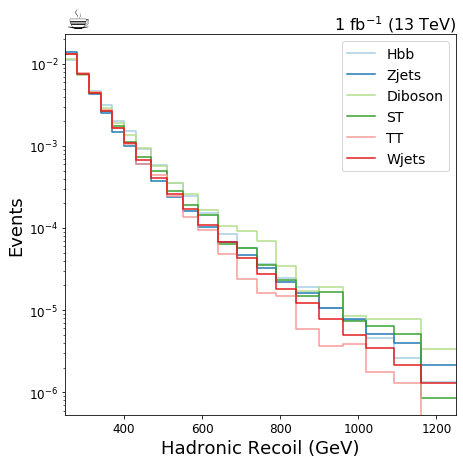

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('jet_selection').project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)